In [3]:
# Toma resultado de results/ y lo formatea como un diccionario de python para generar graficos

resultFiles = ["../results/aleatory_graphs_results_tosh.txt",
              "../results/aleatory_graphs_results_tosh2.txt"]


# Toma un nombre de archivo que tiene los resultados y lo formatea en una tabla.
def parseToTable(fileName):
    with open(fileName) as textFile:
        lines = [line.rstrip('\n') for line in textFile]
        table = [['edge_prob', 'n',
                  'biggest_deg_result', 'biggest_deg_time [ms]',
                  '2_aprox_result', '2_aprox_time [ms]',
                  '2_aprox_improved_result', '2_aprox_improved_time [ms]']]

        for line in lines:
            if line.split(": ")[0] is 'p':
                edge_prob = line.split(": ")[1]
            elif line.split(": ")[0] is 'n':
                vertex_number = line.split(": ")[1]
            elif line.split(": ")[0] == 'mgrade':
                row = []
                row.append(edge_prob)
                row.append(vertex_number)
                results = line.split("; ")
                for result in results: # result has form <algname>: <result> in <time> [ms]
                    if result == '':
                        continue
                    raw_res = result.split(": ")[1] # <result> in <time> [ms]
                    res = raw_res.split(" in ")[0]
                    time = raw_res.split(" in ")[1].split(" ")[0]
                    row.append(res)
                    row.append(time)
                table.append(row)
        return table

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = parseToTable(resultFiles[0])

In [6]:
data[0]

['edge_prob',
 'n',
 'biggest_deg_result',
 'biggest_deg_time [ms]',
 '2_aprox_result',
 '2_aprox_time [ms]',
 '2_aprox_improved_result',
 '2_aprox_improved_time [ms]']

In [53]:
for line in data[0:5]:
    print line 

['edge_prob', 'n', 'biggest_deg_result', 'biggest_deg_time [ms]', '2_aprox_result', '2_aprox_time [ms]', '2_aprox_improved_result', '2_aprox_improved_time [ms]']
['1.0E-5', '32', '0', '0', '0', '0', '0', '0']
['1.0E-5', '64', '0', '0', '0', '0', '0', '0']
['1.0E-5', '128', '0', '0', '0', '0', '0', '0']
['1.0E-5', '256', '1', '0', '2', '0', '2', '0']


In [26]:
d = np.array(data[1:]).astype(np.float64)

In [54]:
plt.figure(figsize=(6*2,4*2))
plt.plot(d[:,1], d[:,2], 'r+', label='Mayor grado')
plt.plot(d[:,1], d[:,4], 'bs', label='2-aprox')
plt.plot(d[:,1], d[:,6], 'g^', label='2-aprox mejorada')
plt.plot(d[:,1], 2*d[:,1], 'y', label='f(x)=2x')
plt.legend()
plt.title('Cubrimiento minimo por vertices aproximado', fontsize=18)
plt.xlabel('Cantidad de nodos')
plt.ylabel('CVM calculado')
plt.show()

In [69]:
def my_plot(x, y, p):
    plt.plot(x, y[0], 'r-', label='Mayor grado')
    plt.plot(x, y[1], 'bs-', label='2-aprox')
    plt.plot(x, y[2], 'g^-', label='2-aprox mejorada')
    plt.plot(x, 2*np.array(x), 'y', label='f(x)=2x')
    plt.title('Cubrimiento minimo por vertices aprocimado\n(arcos con prob={0})'.format(p),
              fontsize=18)
    plt.legend()
    plt.xlabel('Cantidad de nodos')
    plt.ylabel('CVM calculado')
    plt.show()

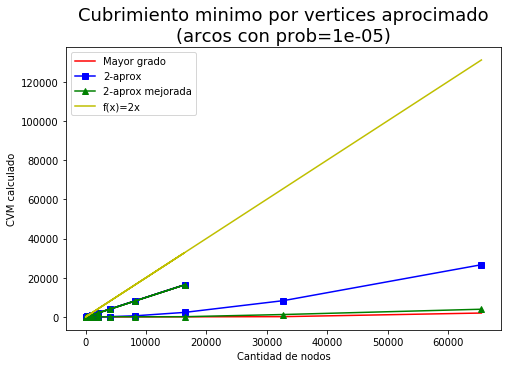

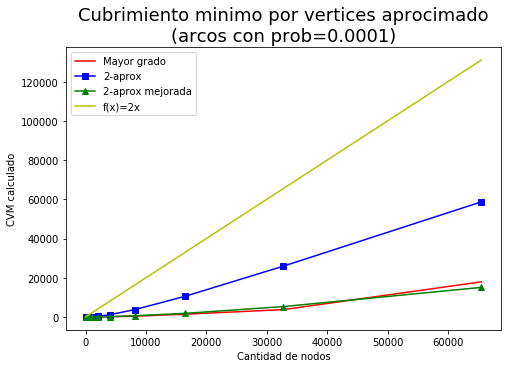

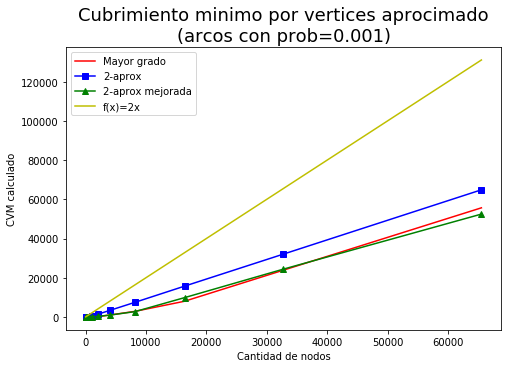

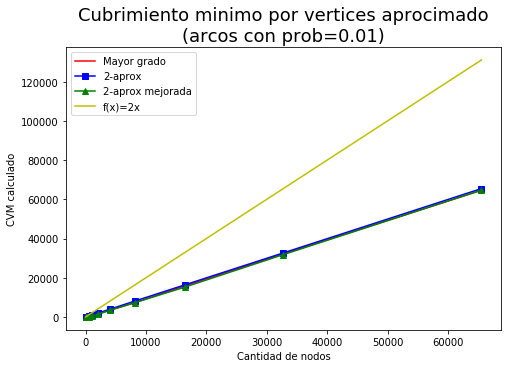

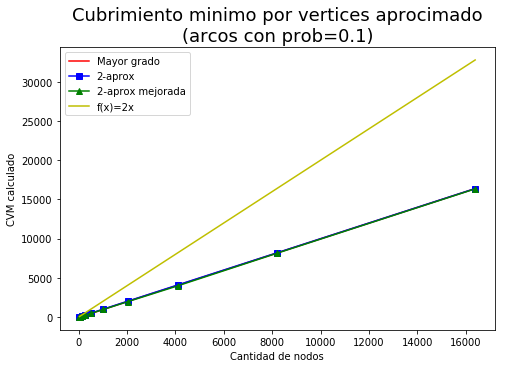

In [72]:
p = None
plt.figure(figsize=(6*1.3,4*1.3))
for line in d:
    if p is None or line[0] == p:
        p = line[0]
        x.append(line[1])
        y[0].append(line[2])
        y[1].append(line[4])
        y[2].append(line[6])
    else:
        my_plot(x, y, p)
        p = line[0]
        x = [line[1]]
        y = [[line[2]],[line[4]],[line[6]]]
        plt.figure(figsize=(6*1.3,4*1.3))
my_plot(x, y, p)